In [ ]:
import numpy as np
import pandas as pd
import pandas.api.types as ptypes
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
pd.options.plotting.backend = "plotly"
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import  LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score  
from sklearn.model_selection import cross_val_predict 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/sample_data/adult.csv")

In [ ]:
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [ ]:
df.shape

(48842, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
df.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [ ]:
df['workclass'] = df['workclass'].replace('?', np.nan)
df['occupation'] = df['occupation'].replace('?', np.nan)
df['native-country'] = df['native-country'].replace('?', np.nan)

In [ ]:
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [ ]:
df.shape

(45222, 15)

In [ ]:
df.duplicated().sum()

47

In [ ]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [ ]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,45175.000000,4.517500e+04,45175.000000,45175.000000,45175.000000,45175.000000
mean,38.556170,1.897388e+05,10.119314,1102.576270,88.687593,40.942512
std,13.215349,1.056524e+05,2.551740,7510.249876,405.156611,12.007730
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173925e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783120e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.379030e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
df.shape

(45175, 15)

In [ ]:
df.education.value_counts()

HS-grad         14770
Some-college     9887
Bachelors        7559
Masters          2513
Assoc-voc        1958
11th             1619
Assoc-acdm       1507
10th             1223
7th-8th           822
Prof-school       785
9th               676
12th              575
Doctorate         544
5th-6th           447
1st-4th           220
Preschool          70
Name: education, dtype: int64

In [ ]:
df.relationship.value_counts()

Husband           18653
Not-in-family     11679
Own-child          6616
Unmarried          4787
Wife               2091
Other-relative     1349
Name: relationship, dtype: int64

In [ ]:
df.income.value_counts()

<=50K    33973
>50K     11202
Name: income, dtype: int64

In [ ]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [ ]:
df = df.astype({'workclass':'category', 'education':'category', 'marital-status':'category', 'occupation':'category','relationship':'category','race':'category','gender':'category', 'native-country':'category', 'income': 'category'})

In [ ]:
df.dtypes

age                   int64
workclass          category
fnlwgt                int64
education          category
educational-num       int64
marital-status     category
occupation         category
relationship       category
race               category
gender             category
capital-gain          int64
capital-loss          int64
hours-per-week        int64
native-country     category
income             category
dtype: object

In [ ]:
fig=px.sunburst(df,values='educational-num',path=['workclass','income'])
fig.update_layout(title="Income vs Workclass of employees",title_x=0.5)
fig.show()

In [ ]:
fig=px.histogram(df,x="education",color="native-country")
fig.update_layout(title="Bar plot with education of employee",title_x=0.5)
fig.show()

In [ ]:
fig=px.histogram(df,x='gender')
# fig.update_layout(title="Gender of employees",title_x=0.5)
fig.show()

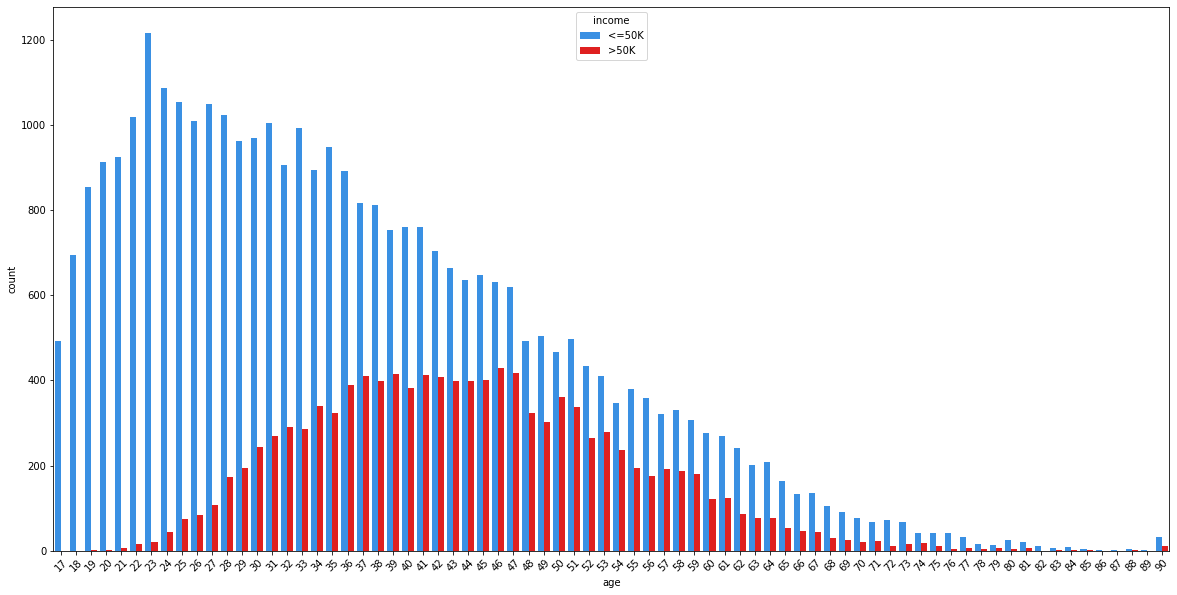

In [ ]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation=45)
sns.countplot(df['age'], hue=df['income'], palette=['dodgerblue', 'red'])

Converting String to Categorical Datatype

In [ ]:
cat_cl = df.select_dtypes(['category']).columns
df[cat_cl] = df[cat_cl].apply(lambda x: x.cat.codes)
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,1,7,4,6,3,2,1,0,0,40,38,0
1,38,2,89814,11,9,2,4,0,4,1,0,0,50,38,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,38,1
3,44,2,160323,15,10,2,6,0,2,1,7688,0,40,38,1
5,34,2,198693,0,6,4,7,1,4,1,0,0,30,38,0
7,63,4,104626,14,15,2,9,0,4,1,3103,0,32,38,1
8,24,2,369667,15,10,4,7,4,4,0,0,0,40,38,0
9,55,2,104996,5,4,2,2,0,4,1,0,0,10,38,0
10,65,2,184454,11,9,2,6,0,4,1,6418,0,40,38,1
11,36,0,212465,9,13,2,0,0,4,1,0,0,40,38,0


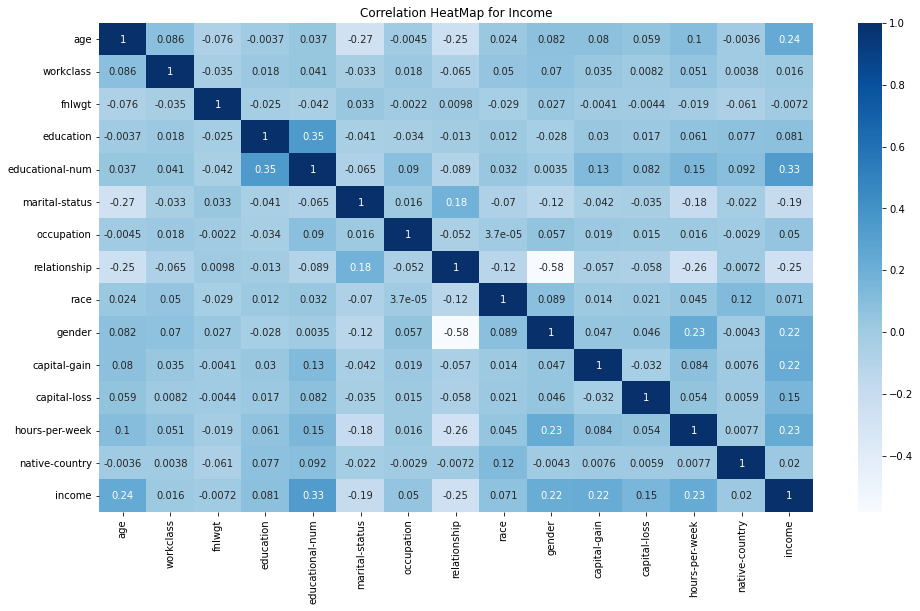

In [ ]:
correlation=df.corr()
plt.figure(figsize= (16,9))
sns.heatmap(correlation, annot = True, cmap= 'Blues')
plt.title('Correlation HeatMap for Income')
plt.show()

In [ ]:
df.columns[df.dtypes=='int64']

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

Normalization

In [ ]:
colm=['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss','hours-per-week']

In [ ]:
df[colm]=(df[colm]-df[colm].min())/(df[colm].max()-df[colm].min())
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.109589,2,0.144430,1,0.400000,4,6,3,2,1,0.000000,0.0,0.397959,38,0
1,0.287671,2,0.051677,11,0.533333,2,4,0,4,1,0.000000,0.0,0.500000,38,0
2,0.150685,1,0.219011,7,0.733333,2,10,0,4,1,0.000000,0.0,0.397959,38,1
3,0.369863,2,0.099418,15,0.600000,2,6,0,2,1,0.076881,0.0,0.397959,38,1
5,0.232877,2,0.125398,0,0.333333,4,7,1,4,1,0.000000,0.0,0.295918,38,0
7,0.630137,4,0.061706,14,0.933333,2,9,0,4,1,0.031030,0.0,0.316327,38,1
8,0.095890,2,0.241163,15,0.600000,4,7,4,4,0,0.000000,0.0,0.397959,38,0
9,0.520548,2,0.061956,5,0.200000,2,2,0,4,1,0.000000,0.0,0.091837,38,0
10,0.657534,2,0.115757,11,0.533333,2,6,0,4,1,0.064181,0.0,0.397959,38,1
11,0.260274,0,0.134723,9,0.800000,2,0,0,4,1,0.000000,0.0,0.397959,38,0


In [ ]:
df.shape

(45175, 15)

Train - Test Split

In [ ]:
X, y=df.iloc[: , :-1],df.iloc[: , -1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=500)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(36140, 14) (9035, 14) (36140,) (9035,)


Logistic Regression

In [ ]:
#LogisticRegression
LRModel=LogisticRegression()
LRModel.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_predtrain = LRModel.predict(X_train)
accuracy_score(y_train, y_predtrain)

0.8081073602656337

In [ ]:
y_pred = LRModel.predict(X_test)
accuracy_score(y_test, y_pred)

0.8141671278361926

In [ ]:
#mean_squared_error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(mse)

0.18583287216380742


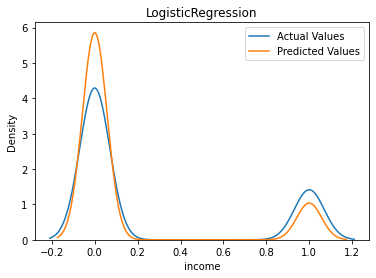

In [ ]:
ax=sns.distplot(y_test,hist=False,label='Actual Values')
y_pred = LRModel.predict(X_test)
ax=sns.distplot(y_pred,hist=False,label='Predicted Values')
ax.set_title('LogisticRegression')
plt.legend()

In [ ]:
con = confusion_matrix(y_test,y_pred)

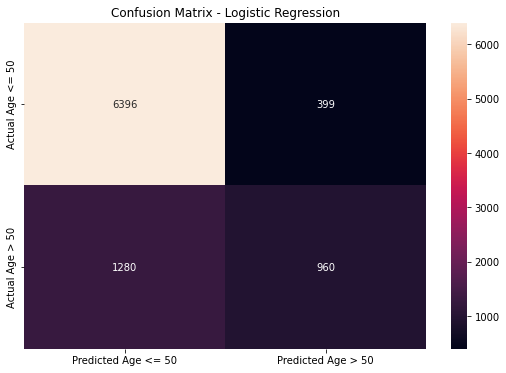

In [ ]:
i = ["Actual Age <= 50", "Actual Age > 50"]
c = ["Predicted Age <= 50", "Predicted Age > 50"]
conf_matrix = pd.DataFrame(data=con, columns=c, index=i)
plt.figure(figsize=(9, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

Gaussian Naive Bayes

In [ ]:
#gaussian naive bayes
GnbModel = GaussianNB()
GnbModel.fit(X_train, y_train)

GaussianNB()

In [ ]:
GnbModel.score(X_train, y_train)

0.7961261759822911

In [ ]:
GnbModel.score(X_test, y_test)

0.8019922523519646

In [ ]:
y_pred = GnbModel.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(mse)

0.19800774764803541


In [ ]:
ax=sns.distplot(y_test,hist=False,label='Actual Values')
y_pred = GnbModel.predict(X_test)
ax=sns.distplot(y_pred,hist=False,label='Predicted Values')
ax.set_title('Gaussian Naive Bayes')
plt.legend()

In [ ]:
con1 = confusion_matrix(y_test,y_pred)
i = ["Actual Age <= 50", "Actual Age > 50"]
c = ["Predicted Age <= 50", "Predicted Age > 50"]
conf_matrix = pd.DataFrame(data=con1, columns=c, index=i)
plt.figure(figsize=(9, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.title("Confusion Matrix - Gaussian Naive Bayes")
plt.show()

K - Nearest Neighbors Classifier

In [ ]:
#K - NN
KnnModel=KNeighborsClassifier(n_neighbors=20)
KnnModel.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=20)

In [ ]:
KnnModel.score(X_train,y_train)

0.8415882678472607

In [ ]:
KnnModel.score(X_test,y_test)

0.8255672385168789

In [ ]:
y_pred = KnnModel.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(mse)

0.1744327614831212


In [ ]:
ax=sns.distplot(y_test,hist=False,label='Actual Values')
y_pred = KnnModel.predict(X_test)
ax=sns.distplot(y_pred,hist=False,label='Predicted Values')
ax.set_title('KNeighborsClassifier')
plt.legend()

In [ ]:
con2 = confusion_matrix(y_test,y_pred)
i = ["Actual Age <= 50", "Actual Age > 50"]
c = ["Predicted Age <= 50", "Predicted Age > 50"]
conf_matrix = pd.DataFrame(data=con2, columns=c, index=i)
plt.figure(figsize=(9, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.title("Confusion Matrix - KNN")
plt.show()

Support Vector Classifier

In [ ]:
from sklearn import svm
SVC_Model = svm.SVC(kernel='linear', degree=2)
SVC_Model.fit(X_train, y_train)

0.8140564471499724

In [ ]:
y_pred=SVC_Model.predict(X_train)
accuracy_score(y_train,y_pred)

0.8088821250691755

In [ ]:
y_pred=SVC_Model.predict(X_test)
accuracy_score(y_test,y_pred)

0.8140564471499724

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(mse)

0.18594355285002767


In [ ]:
ax=sns.distplot(y_test,hist=False,label='Actual Values')
ax=sns.distplot(y_pred,hist=False,label='Predicted Values')
ax.set_title('SupportVectorClassifier')
plt.legend()

In [ ]:
con3 = confusion_matrix(y_test,y_pred)
i = ["Actual Age <= 50", "Actual Age > 50"]
c = ["Predicted Age <= 50", "Predicted Age > 50"]
conf_matrix = pd.DataFrame(data=con3, columns=c, index=i)
plt.figure(figsize=(9, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.title("Confusion Matrix - SVM")
plt.show()

Decision Tree

In [ ]:
DtreeModel = DecisionTreeClassifier(max_depth = 5, random_state = 8)
DtreeModel.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=8)

In [ ]:
DtreeModel.score(X_train,y_train)

0.8482014388489209

In [ ]:
DtreeModel.score(X_test,y_test)

0.8520199225235197

In [ ]:
y_pred = DtreeModel.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(mse)

0.14798007747648034


In [ ]:
ax=sns.distplot(y_test,hist=False,label='Actual Values')
y_pred = DtreeModel.predict(X_test)
ax=sns.distplot(y_pred,hist=False,label='Predicted Values')
ax.set_title('Decision Tree Classifier')
plt.legend()

In [ ]:
con4 = confusion_matrix(y_test,y_pred)
i = ["Actual Age <= 50", "Actual Age > 50"]
c = ["Predicted Age <= 50", "Predicted Age > 50"]
conf_matrix = pd.DataFrame(data=con4, columns=c, index=i)
plt.figure(figsize=(9, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

Random Forest Classifier

In [ ]:
#Random Forest
RFModel=RandomForestClassifier()
RFModel.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
RFModel.score(X_train,y_train)

0.9999169894853348

In [ ]:
RFModel.score(X_test,y_test)

0.8542335362479248

In [ ]:
y_pred = RFModel.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(mse)

0.14576646375207528


In [ ]:
ax=sns.distplot(y_test,hist=False,label='Actual Values')
y_pred = RFModel.predict(X_test)
ax=sns.distplot(RFModel.predict(X_test),hist=False,label='Predicted Values')
ax.set_title('RandomForestClassifier')
plt.legend()

In [ ]:
con5 = confusion_matrix(y_test,y_pred)
i = ["Actual Age <= 50", "Actual Age > 50"]
c = ["Predicted Age <= 50", "Predicted Age > 50"]
conf_matrix = pd.DataFrame(data=con5, columns=c, index=i)
plt.figure(figsize=(9, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.title("Confusion Matrix - Random Forest")
plt.show()

Cross Validation

In [ ]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict 
kfold = KFold(n_splits=10, random_state=None) 
xyz=[]
accuracy=[]
std=[]
classifiers=['Logistic Regression','Gaussian Naive Bayes','KNN','Support Vector Classifier','Decision Tree','Random Forest']
models = [LRModel,GnbModel, KnnModel, SVC_Model, DtreeModel, RFModel]

for i in models:
    model = i
    cv_result = cross_val_score(model,X,y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
models_dataframe=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
models_dataframe

,CV Mean,Std
Logistic Regression,0.809164,0.005204
Gaussian Naive Bayes,0.796923,0.002472
KNN,0.826940,0.003990
Support Vector Classifier,0.810116,0.003223
Decision Tree,0.847549,0.004802
Random Forest,0.852241,0.003990


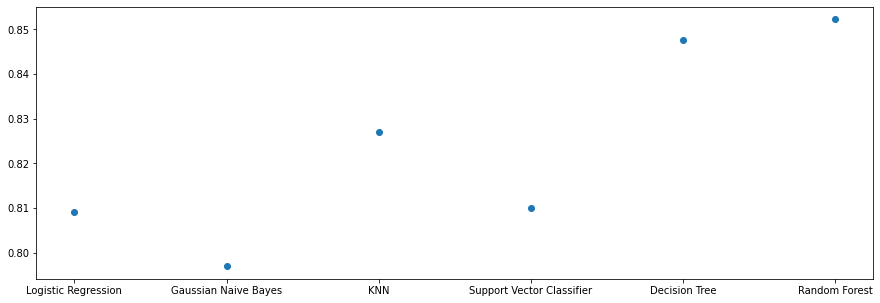

In [ ]:
plt.figure(figsize = (15, 5))
plt.scatter(classifiers,xyz)
plt.show()

Feature : 0 has score  : -0.4601293025577849 
Feature : 1 has score  : -0.24182293611044475 
Feature : 2 has score  : -0.1305289507922846 
Feature : 3 has score  : -0.07238383914170195 
Feature : 4 has score  : -0.0019088098359019198 
Feature : 5 has score  : 0.0042564869263115625 
Feature : 6 has score  : 0.006340738206166303 
Feature : 7 has score  : 0.02095855370469415 
Feature : 8 has score  : 0.546518551819223 
Feature : 9 has score  : 1.7807940313756252 
Feature : 10 has score  : 2.164225496183604 
Feature : 11 has score  : 2.582710361305024 
Feature : 12 has score  : 3.9584947347390003 
Feature : 13 has score  : 4.888354594616413 


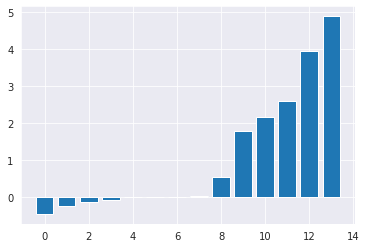

In [ ]:
#Variable Importance Logistic Regression
LRModel.fit(X,y)
importance=LRModel.coef_[0]
importance=np.sort(importance)

for index,val in enumerate(importance):
    print("Feature : {} has score  : {} ".format(index,val))

sns.set_style("darkgrid")
plt.bar([i for i in range (len(importance))],importance)
plt.show()

Feature : 0 has score  : -0.08260792819874041 
Feature : 1 has score  : -0.07834271946774152 
Feature : 2 has score  : -0.0598581239013356 
Feature : 3 has score  : -0.0035460590461298125 
Feature : 4 has score  : 8.692730261827819e-05 
Feature : 5 has score  : 0.002035295290625072 
Feature : 6 has score  : 0.03347666954630313 
Feature : 7 has score  : 0.3527687250101101 
Feature : 8 has score  : 0.36953205992796256 
Feature : 9 has score  : 0.9428464390985432 
Feature : 10 has score  : 1.2127304068820024 
Feature : 11 has score  : 2.525832351910006 
Feature : 12 has score  : 2.559544238833408 
Feature : 13 has score  : 19.85504190851177 


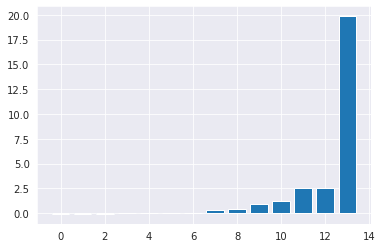

In [ ]:
#Variable Importance SVC
SVC_Model.fit(X,y)
importance=SVC_Model.coef_[0]
importance=np.sort(importance)

for index,val in enumerate(importance):
    print("Feature : {} has score  : {} ".format(index,val))

sns.set_style("darkgrid")
plt.bar([i for i in range (len(importance))],importance)
plt.show()

Feature: 0  Score: -9.297177642506594e-05
Feature: 1  Score: 6.640841173211065e-05
Feature: 2  Score: 0.0001328168234642657
Feature: 3  Score: 0.00026120641947977583
Feature: 4  Score: 0.0005356945213060183
Feature: 5  Score: 0.0008367459878250826
Feature: 6  Score: 0.0011909241837299023
Feature: 7  Score: 0.0017930271167680757
Feature: 8  Score: 0.0019081350304371637
Feature: 9  Score: 0.0021117874930824286
Feature: 10  Score: 0.0028644161593801786
Feature: 11  Score: 0.005396790260099582
Feature: 12  Score: 0.024185943552849976
Feature: 13  Score: 0.06265855008301047


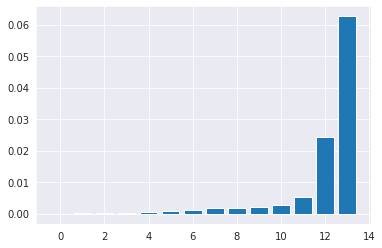

In [ ]:
#Variable Importance Gaussian Naive Bayes 
from matplotlib import pyplot
from sklearn.inspection import permutation_importance
GnbModel.fit(X,y)
results = permutation_importance(GnbModel, X, y, scoring='accuracy')
importance = results.importances_mean
importance=np.sort(importance)
for i,v in enumerate(importance):
    print('Feature: {}  Score: {}' .format(i,v))
pyplot.bar([x for x in range(len(importance))] ,importance)
pyplot.show()

Feature: 0  Score: 0.00012396236856666577
Feature: 1  Score: 0.00034532374100717524
Feature: 2  Score: 0.0018284449363586085
Feature: 3  Score: 0.0020055340343110074
Feature: 4  Score: 0.0032008854454897316
Feature: 5  Score: 0.00323630326508022
Feature: 6  Score: 0.004325401217487523
Feature: 7  Score: 0.005613724405091292
Feature: 8  Score: 0.011758716104039845
Feature: 9  Score: 0.014361925843940204
Feature: 10  Score: 0.019346983951300478
Feature: 11  Score: 0.04157166574432758
Feature: 12  Score: 0.04416159380188158
Feature: 13  Score: 0.06316768123962366


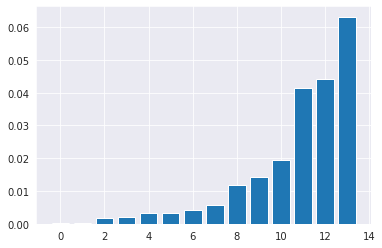

In [ ]:
#Variable Importance KNN 
from matplotlib import pyplot
from sklearn.inspection import permutation_importance
KnnModel.fit(X,y)
results = permutation_importance(KnnModel, X, y, scoring='accuracy')
importance = results.importances_mean
importance=np.sort(importance)
for i,v in enumerate(importance):
    print('Feature: {}  Score: {}' .format(i,v))
pyplot.bar([x for x in range(len(importance))] ,importance)
pyplot.show()

Feature: 0, Score: 0.0
Feature: 1, Score: 0.0
Feature: 2, Score: 0.0
Feature: 3, Score: 0.0
Feature: 4, Score: 0.0
Feature: 5, Score: 0.0
Feature: 6, Score: 0.00021270912052782397
Feature: 7, Score: 0.0035920695512579757
Feature: 8, Score: 0.003600674154070468
Feature: 9, Score: 0.015549094579728346
Feature: 10, Score: 0.04464753327446811
Feature: 11, Score: 0.22867376575050297
Feature: 12, Score: 0.23535552649351887
Feature: 13, Score: 0.46836862707592536


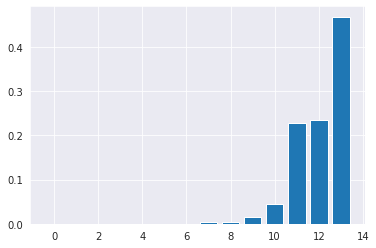

In [ ]:
#Variable Importance Decision Tree
DtreeModel.fit(X, y)
importance = DtreeModel.feature_importances_
importance=np.sort(importance)

for i,v in enumerate(importance):
    print('Feature: {}, Score: {}'.format(i,v))

plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature: 0, Score: 0.010751431391790776
Feature: 1, Score: 0.013286479093303103
Feature: 2, Score: 0.015194742572471397
Feature: 3, Score: 0.030644210861482564
Feature: 4, Score: 0.036562721927016865
Feature: 5, Score: 0.03677594671842135
Feature: 6, Score: 0.0622675567565662
Feature: 7, Score: 0.06510229256343528
Feature: 8, Score: 0.0810305452100031
Feature: 9, Score: 0.088941372475099
Feature: 10, Score: 0.11057673756704876
Feature: 11, Score: 0.11637327914940354
Feature: 12, Score: 0.15085668236945354
Feature: 13, Score: 0.18163600134450456


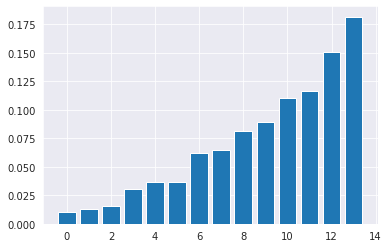

In [ ]:
#Variable Importance Random Forest
RFModel.fit(X, y)
importance = RFModel.feature_importances_
importance=np.sort(importance)

for i,v in enumerate(importance):
    print('Feature: {}, Score: {}'.format(i,v))

plt.bar([x for x in range(len(importance))], importance)
plt.show()

Bootstrap

In [155]:
from sklearn.utils import resample
# bootstrap predictions
accuracy_lr = []
n_iterations = 1000
for i in range(n_iterations):
    X_bs, y_bs = resample(X_train, y_train, replace=True)
    # make predictions
    y_hat = LRModel.predict(X_bs)
    # evaluate model
    score = accuracy_score(y_bs, y_hat)
    accuracy_lr.append(score)

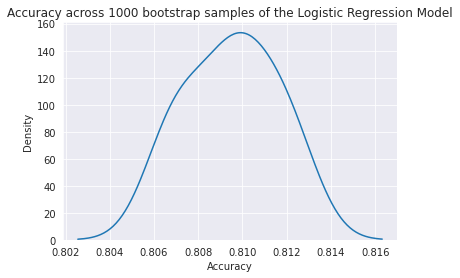

In [156]:
# plot distribution of accuracy
sns.kdeplot(accuracy_lr)
plt.title("Accuracy across 1000 bootstrap samples of the Logistic Regression Model")
plt.xlabel("Accuracy")
plt.show()

In [157]:
accuracy = []
n_iterations = 1000
for i in range(n_iterations):
    X_bs, y_bs = resample(X_train, y_train, replace=True)
    # make predictions
    y_hat = GnbModel.predict(X_bs)
    # evaluate model
    score = accuracy_score(y_bs, y_hat)
    accuracy.append(score)

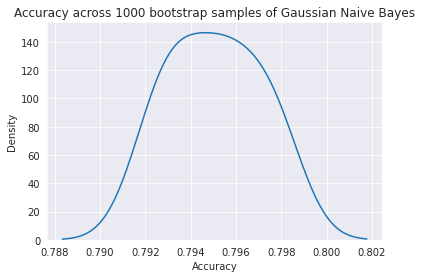

In [158]:
# plot distribution of accuracy
sns.kdeplot(accuracy)
plt.title("Accuracy across 1000 bootstrap samples of Gaussian Naive Bayes")
plt.xlabel("Accuracy")
plt.show()

In [159]:
accuracy = []
n_iterations = 1000
for i in range(n_iterations):
    X_bs, y_bs = resample(X_train, y_train, replace=True)
    # make predictions
    y_hat = KnnModel.predict(X_bs)
    # evaluate model
    score = accuracy_score(y_bs, y_hat)
    accuracy.append(score)

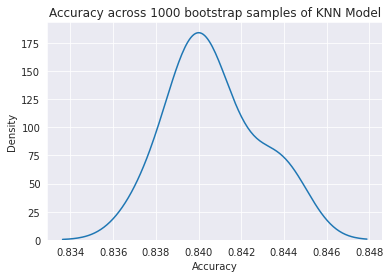

In [160]:
# plot distribution of accuracy
sns.kdeplot(accuracy)
plt.title("Accuracy across 1000 bootstrap samples of KNN Model")
plt.xlabel("Accuracy")
plt.show()

In [161]:
accuracy = []
n_iterations = 1000
for i in range(n_iterations):
    X_bs, y_bs = resample(X_train, y_train, replace=True)
    # make predictions
    y_hat = SVC_Model.predict(X_bs)
    # evaluate model
    score = accuracy_score(y_bs, y_hat)
    accuracy.append(score)

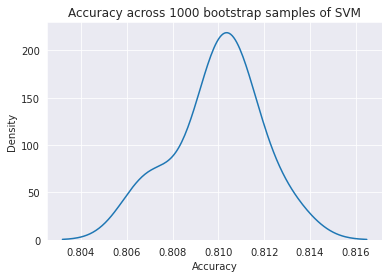

In [162]:
# plot distribution of accuracy
sns.kdeplot(accuracy)
plt.title("Accuracy across 1000 bootstrap samples of SVM")
plt.xlabel("Accuracy")
plt.show()

In [163]:
accuracy = []
n_iterations = 1000
for i in range(n_iterations):
    X_bs, y_bs = resample(X_train, y_train, replace=True)
    # make predictions
    y_hat = DtreeModel.predict(X_bs)
    # evaluate model
    score = accuracy_score(y_bs, y_hat)
    accuracy.append(score)

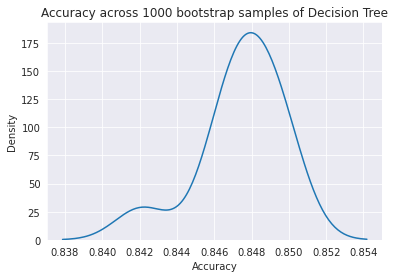

In [164]:
# plot distribution of accuracy
sns.kdeplot(accuracy)
plt.title("Accuracy across 1000 bootstrap samples of Decision Tree")
plt.xlabel("Accuracy")
plt.show()

In [165]:
accuracy = []
n_iterations = 1000
for i in range(n_iterations):
    X_bs, y_bs = resample(X_train, y_train, replace=True)
    # make predictions
    y_hat = RFModel.predict(X_bs)
    # evaluate model
    score = accuracy_score(y_bs, y_hat)
    accuracy.append(score)

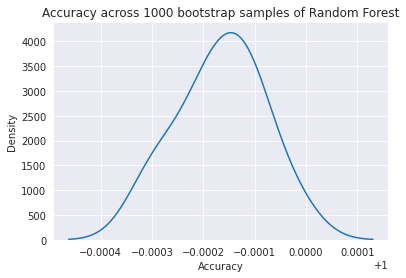

In [166]:
# plot distribution of accuracy
sns.kdeplot(accuracy)
plt.title("Accuracy across 1000 bootstrap samples of Random Forest")
plt.xlabel("Accuracy")
plt.show()